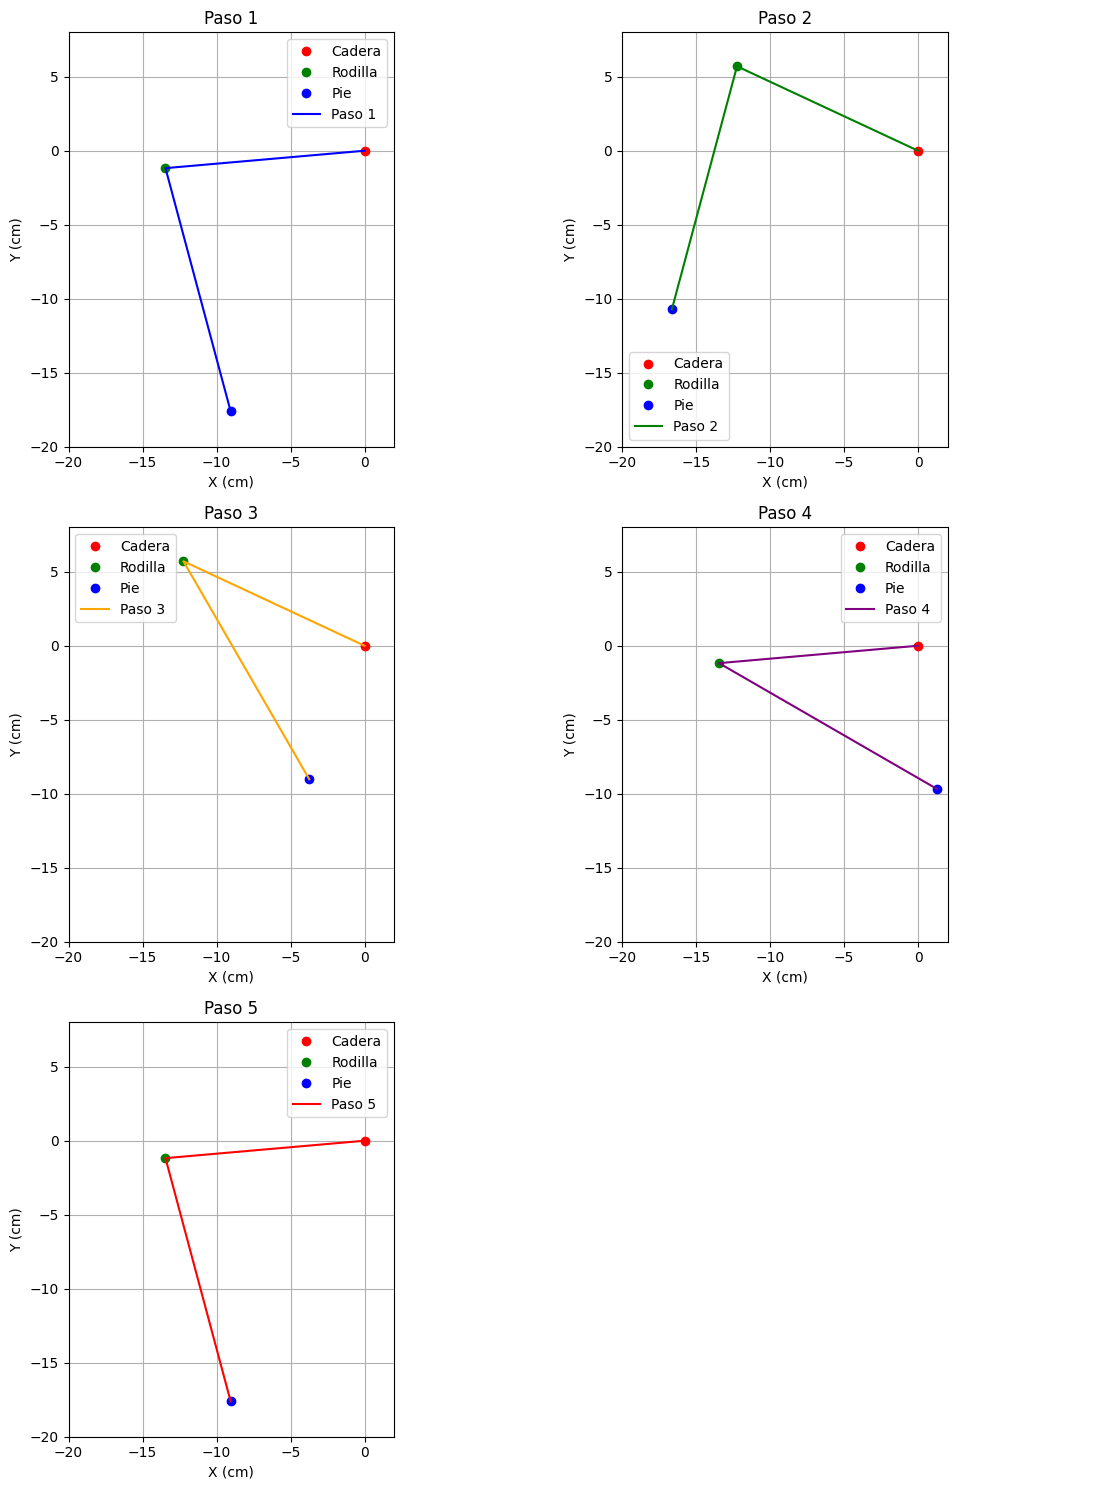

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Longitudes de los eslabones
l1 = 13.5  # longitud de la cadera a la rodilla (cm)
l2 = 17  # longitud de la rodilla al pie (cm)

# Ángulos de las articulaciones (en grados) para los cinco pasos
thetas = [
    (185, 100),  # Paso 1
    (155, 100),   # Paso 2
    (155, 145),   # Paso 3
    (185, 145),  # Paso 4
    (185, 100)   # Paso 5 (volver al paso inicial)
]

# Colores para los diferentes pasos
colors = ['blue', 'green', 'orange', 'purple', 'red']

# Crear la figura y los ejes para los cinco subgráficos
fig, axs = plt.subplots(3, 2, figsize=(12, 15))
axs = axs.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Iterar sobre cada paso y visualizar la posición del pie en cada paso
for i, (theta1, theta2) in enumerate(thetas, start=1):
    # Calcular las coordenadas del pie (posición final)
    x_foot = l1 * np.cos(np.radians(theta1)) + l2 * np.cos(np.radians(theta1 + theta2))
    y_foot = l1 * np.sin(np.radians(theta1)) + l2 * np.sin(np.radians(theta1 + theta2))
    
    # Visualizar la posición del pie en el subgráfico correspondiente
    ax = axs[i-1]
    ax.plot(0, 0, 'ro', label='Cadera')
    ax.plot(l1 * np.cos(np.radians(theta1)), l1 * np.sin(np.radians(theta1)), 'go', label='Rodilla')
    ax.plot(x_foot, y_foot, 'bo', label='Pie')
    ax.plot([0, l1 * np.cos(np.radians(theta1)), x_foot], [0, l1 * np.sin(np.radians(theta1)), y_foot], 
            color=colors[i-1], label=f'Paso {i}')
    
    # Configurar el subgráfico
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_title(f'Paso {i}')
    ax.grid(True)
    ax.set_xlim(-20, 2)
    ax.set_ylim(-20, 8)
    ax.set_aspect('equal', adjustable='box')
    ax.legend()

# Añadir un espacio vacío para el último subgráfico que no se usa
axs[5].axis('off')

plt.tight_layout()
plt.show()


In [65]:
calibrations = {}

DERECHA_SUPERIOR = 0
DERECHA_INFERIOR = 1
IZQUIERDA_SUPERIOR = 2
IZQUIERDA_INFERIOR = 3


def calibrate_servo(servo_name, joint_angle_ref, servo_angle_ref):
    """
    Calibrates a servo by storing the reference joint angle and servo angle.

    Parameters:
    - servo_name (str): The name of the servo.
    - joint_angle_ref (float): The reference joint angle for calibration.
    - servo_angle_ref (float): The reference servo angle for calibration.

    Returns:
    None
    """
    calibrations[servo_name] = {
        'joint_angle_ref': joint_angle_ref,
        'servo_angle_ref': servo_angle_ref,
    }

# Función de mapeo de ángulos
def map_angle_to_servo(servo_name, joint_angle):
    """
    Maps the joint angle to the corresponding servo angle based on the servo name.

    Args:
        servo_name (str): The name of the servo.
        joint_angle (float): The joint angle to be mapped.

    Returns:
        float: The mapped servo angle if the servo name is valid and the servo angle is within the range [0, 180].
        None: If the servo name is invalid or the mapped servo angle is outside the range [0, 180].
    """
    calib = calibrations[servo_name]
    
    if DERECHA_SUPERIOR == servo_name:
        servo_angle = (calib['joint_angle_ref'] - joint_angle) + calib['servo_angle_ref'] 
    elif DERECHA_INFERIOR == servo_name:
        servo_angle = (calib['joint_angle_ref'] - joint_angle) + calib['servo_angle_ref'] 
    elif IZQUIERDA_SUPERIOR == servo_name:
        servo_angle = ( joint_angle - calib['joint_angle_ref']) + calib['servo_angle_ref'] 
    elif IZQUIERDA_INFERIOR == servo_name:
        servo_angle = ( joint_angle - calib['joint_angle_ref']) + calib['servo_angle_ref'] 
    else: return None
    
    if servo_angle < 0 or servo_angle > 180:
        return None
    return servo_angle  # Asegurar que el ángulo está dentro del rango [0, 180]


# Calibración proporcionada por el usuario
calibrate_servo(IZQUIERDA_SUPERIOR, 185, 30)  # Calibración del servo 1: (185 en esquema) => 150 grados en el servo
calibrate_servo(IZQUIERDA_INFERIOR, 100, 135)   # Calibración del servo 2: (100 en esquema) => 130 grados en el servo
calibrate_servo(DERECHA_SUPERIOR, 185, 150)  # Calibración del servo 1: (185 en esquema) => 150 grados en el servo
calibrate_servo(DERECHA_INFERIOR, 100, 45)   # Calibración del servo 2: (100 en esquema) => 45 grados en el servo


# Los ángulos de las articulaciones para los cinco pasos
joint_angles = [
    (-175, 100),  # Paso 1
    (155, 100),   # Paso 2
    (155, 145),   # Paso 3
    (185, 145),  # Paso 4
    (185, 100),   # Paso 5 (volver al paso inicial)
    (300, 100)   # Paso 5 (volver al paso inicial)

]

servo_angles_izquierda = []
for joint1, joint2 in joint_angles:
    servo1 = map_angle_to_servo(IZQUIERDA_SUPERIOR, joint1)
    servo2 = map_angle_to_servo(IZQUIERDA_INFERIOR, joint2)
    if (servo1 == None or servo2 == None):
        continue
    servo_angles_izquierda.append((servo1, servo2))


servo_angles_derecha =[]
for joint1, joint2 in joint_angles:
    servo1 = map_angle_to_servo(DERECHA_SUPERIOR, joint1)
    servo2 = map_angle_to_servo(DERECHA_INFERIOR, joint2)
    if (servo1 == None or servo2 == None):
        continue
    servo_angles_derecha.append((servo1, servo2))

for i, (servo1, servo2) in enumerate(servo_angles_derecha, start=1):
    print(f'Paso {i}: Servo 1: {servo1:.2f} grados, Servo 2: {servo2:.2f} grados')

print("------------------------------------------------------------------")

for i, (servo1, servo2) in enumerate(servo_angles_izquierda, start=1):
    print(f'Paso {i}: Servo 1: {servo1:.2f} grados, Servo 2: {servo2:.2f} grados')

Paso 1: Servo 1: 180.00 grados, Servo 2: 45.00 grados
Paso 2: Servo 1: 180.00 grados, Servo 2: 0.00 grados
Paso 3: Servo 1: 150.00 grados, Servo 2: 0.00 grados
Paso 4: Servo 1: 150.00 grados, Servo 2: 45.00 grados
Paso 5: Servo 1: 35.00 grados, Servo 2: 45.00 grados
------------------------------------------------------------------
Paso 1: Servo 1: 0.00 grados, Servo 2: 135.00 grados
Paso 2: Servo 1: 0.00 grados, Servo 2: 180.00 grados
Paso 3: Servo 1: 30.00 grados, Servo 2: 180.00 grados
Paso 4: Servo 1: 30.00 grados, Servo 2: 135.00 grados
Paso 5: Servo 1: 145.00 grados, Servo 2: 135.00 grados
